# Phase 1: Research & Setup

Objective: Define the model scope, set up the development environment, and prepare data sources.

## ✅ Define System Scope

### Identify agent types

All agents have one goal which is to maximise their profit.

- **Consumer**:
    - Type: None
    - Attributes: persona, initial resources, energy mix, energy needs, buying price (from prosumers), distance from grid ?
    - Actions: do nothing, buy from utility, buy from local grid (prosumer)
<br> 
<br>

- **Prosumer (inherited from Consumer)**: consumer that also produces energy locally and can either sell it on the grid or use it for its personnal consumption 
    - Type: photovoltaic (PV)
    - Attributes: inherited from consumers, production level, max capacity of production, electricity storage level, selling price
    - Objects: maintainance rate of the PV, lifetime of the PV
    - Actions: inherited from consumer, change sell price on the local grid, change volume sold on the local grid, disconnect from local grid
<br> 
<br>

- **Energy producer**: generate energy and determine their production levels, facility upgrades, and pricing strategies
    - Type: oil, renewables
    - State: connected energy suppliers/utilities
    - Attributes: persona, initial resources, volume of production, max production capacity, production costs, price to sell energy to utility
    - Actions: change price to sell energy to utility, invest money to upgrade facility max capacity
<br> 
<br>

- **Energy utility**: purchase energy from producers and sell it to consumers
    - Type: eco-friendly, balanced, greedy
    - Attributes: persona, initial resources, selling price to consumer, volume of energy to deal, regulatory constraint (% of renewable to buy)
    - Actions: change price to sell energy to consumer, select energy supplier company, risk hedging by negotiating future contracts
<br> 
<br>

- ***Regulators***: dynamic regulation in reaction to market failures
    - Type: None
    - Attributes: persona
    - Actions: Penalties & incentives (fines on price gouging or reward green energy investments)


---

### Define market dynamics:

- Scenario 1: 
    -   Auction-based energy exchange for local grid
    -   Contracts with secured price for utility supplier
- Scenario 2: 
    - Auction-based trading for everything


---

### Select LLM use cases: 

- Consumer:
    - Decides wether to buy energy from utility or from the grid
    - Decides from which utility / grid node buy energy

- Prosumer (inherited from Consumer):
    - Decides wether to sell or consume energy produced

- Energy producer:
    - Determines energy production levels and selling prices
    - Decides whether to upgrade facilities to increase production limits (considering the associated costs)


- Utility:
    - Decides energy purchase amounts and consumer pricing to meet consumer demand
    - Randomly assigned one of three personas: [environmentally conscious, greedy, depressed]

- *Regulator*:
    - Decides wether to impose a policy to regulate the market

# 2. MESA FRAMEWORK - ABM ARCHITECTURE

In [24]:
from mesa import Agent
import numpy as np

PRODUCER_TYPE = [
    "OilAndGas",
    "RenewableEnergy",]

UTILITY_PERSONA = [
    "environmentally conscious",
    "greedy",
    "depressed"    
]


class EnergyMarketAgent(Agent):
    """Base class for all agents in the energy market."""
    def __init__(self, unique_id, model, persona, initial_resources):
        super().__init__(unique_id, model)
        self.persona = persona
        self.resources = initial_resources
        self.profit = 0

    def step(self):
        self.update_state()

    def update_state(self):
        print(f"I am {self.__class__.__name__} agent number: {np.random.uniform(1, 1000):.2f}")
        pass

class ConsumerAgent(EnergyMarketAgent):
    """Consumer agent that purchases energy."""
    def __init__(self,
                 unique_id,
                 model,
                 persona,
                 initial_resources=50,
                 energy_needs=5,
                 ):
        super().__init__(unique_id, model, persona, initial_resources)
        # Initialize parameters for consumer
        self.energy_needs: int = energy_needs
    
    def step(self):
        # Decision making for buying energy
        super().step()
        self.decide_energy_source()

    def decide_energy_source(self):
        """LLM decision tio do nothing, buy from main grid or buy from local grid."""
        # TODO: Implement LLM-based decision making for energy source selection
        pass

class ProsumerAgent(ConsumerAgent):
    """Prosumer agent that can both consume and produce energy."""
    def __init__(self,
                 unique_id,
                 model,
                 persona,
                 initial_resources=50,
                 energy_needs=5,
                 max_capacity=1,  # Maximum production capacity
                 capacity_upgrade_cost=200,  # Amount of capacity increase per upgrade
                 capacity_upgrade_amount=1,  # Amount of capacity increase per upgrade
                 max_energy_stored=2,
                 ):
        super().__init__(unique_id, model, persona, initial_resources, energy_needs)
        # Initialize parameters for prosumer
        self.production = 0
        self.max_capacity = max_capacity 
        self.energy_stored = 0
        self.max_energy_stored = max_energy_stored
        self.energy_price = 0  # Price of energy sold on local grid
        self.capacity_upgrade_cost=capacity_upgrade_cost
        self.capacity_upgrade_amount=capacity_upgrade_amount
        
    def step(self):
        super().step()
        self.decide_production_allocation()

    def decide_production_allocation(self, *args, **kwargs):
        """LLM decision local grid strategy."""
        # TODO: Implement LLM-based decision making for production allocation
        pass

class EnergyProducerAgent(EnergyMarketAgent):
    """Energy producer agent that generates and sells energy."""
    def __init__(self, 
                 unique_id,
                 model,
                 persona,
                 production_type,
                 initial_resources=1000, # Starting production level
                 production=100, # Starting production level
                 energy_price=50, # Price of energy for producers
                 production_cost=30,  # Base cost of production
                 max_capacity = 300,  # Maximum production capacity
                 capacity_upgrade_cost = 50000,  # Cost to upgrade capacity by capacity_upgrade_amount
                 capacity_upgrade_amount = 30,  # Amount of capacity increase per upgrade
                 ):
        super().__init__(unique_id, model, persona, initial_resources)
        self.resources = 1000  # Starting resources
        self.production = production
        self.energy_price = energy_price # Price of energy for producers
        self.production_type = production_type if production_type else str(np.random.choice(PRODUCER_TYPE))
        # self.cost_to_consumer = 20 if company_type == "UtilityProvider" else None  # Cost to consumer for utility providers
        self.max_capacity = max_capacity
        self.production_cost = production_cost
        self.capacity_upgrade_cost = capacity_upgrade_cost
        self.capacity_upgrade_amount = capacity_upgrade_amount
        self.profit = 0
        self.connections = {}  # Supply chain connections
        self.unmet_demand = 0
        
    def step(self):
        self.determine_production_strategy()
        super().step()
        
    def determine_production_strategy(self):
        # TODO: Implement LLM-based decision making for production strategy
        pass

class UtilityAgent(EnergyMarketAgent):
    """Utility agent that buys from producers and sells to consumers."""
    def __init__(self,
                 unique_id,
                 model,
                 persona,
                 utility_type,
                 renewable_quota=0,
                 initial_resources=1000,
                 energy_price=0,
                 cost_to_consumer=20,
                ):
        super().__init__(unique_id, model, persona, initial_resources)
        self.utility_type = utility_type if utility_type else str(np.random.choice(UTILITY_PERSONA))
        self.renewable_quota = renewable_quota
        self.energy_price = energy_price
        self.cost_to_consumer = cost_to_consumer
        self.energy_purchased = 0
        self.suppliers = {}  # {supplier_id: purchase_amount}
        
    def step(self):
        self.determine_market_strategy()
        super().step()
        
    def determine_market_strategy(self):
        # TODO: Implement LLM-based decision making for market strategy
        pass

class RegulatorAgent(EnergyMarketAgent):
    """Regulator agent that oversees market dynamics."""
    def __init__(self, unique_id, model, persona):
        super().__init__(unique_id, model, persona, float('inf'))

    def step(self):
        self.evaluate_market_conditions()
        super().step()

    def evaluate_market_conditions(self):
        # TODO: Implement LLM-based decision making for market regulation
        pass

In [25]:
from mesa import Model
from mesa.space import MultiGrid
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector

class EnergyMarketModel(Model):
    """Energy market model with multiple agent types."""
    def __init__(self, 
                 num_consumers=4,
                 num_prosumers=2,
                 num_producers=2,
                 num_utilities=2,
                 width=20, 
                 height=20):
        super().__init__()
        self.num_consumers = num_consumers
        self.num_prosumers = num_prosumers
        self.num_producers = num_producers
        self.num_utilities = num_utilities
        
        # self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        
        # Create agents
        self.create_agents()
        
        # Data collection
        self.datacollector = DataCollector(
            model_reporters={
                "Average_Price": lambda m: np.mean([a.energy_price for a in m.schedule.agents 
                                                  if isinstance(a, (ProsumerAgent, EnergyProducerAgent, UtilityAgent))]),
                "Total_Production": lambda m: sum([a.production for a in m.schedule.agents 
                                                 if isinstance(a, (ProsumerAgent, EnergyProducerAgent))])
            },
            agent_reporters={
                "Profit": "profit",
                "Resources": "resources"
            }
        )
    
    def create_agents(self):
        # Create consumers
        consumers = []
        for i in range(self.num_consumers):
            consumer = ConsumerAgent(
                unique_id=f"consumer_{i}", 
                model=self, 
                persona="default",
                # initial_resources=1000,
                # energy_needs=200,
                )
            self.schedule.add(consumer)
            consumers.append(consumer)
            
        # Create prosumers
        for i in range(self.num_prosumers):
            prosumer = ProsumerAgent(unique_id=f"prosumer_{i}", 
                                model=self, 
                              persona="default",
                            #   initial_resources=1000,
                            #   energy_needs=200,
                            #   max_capacity=np.random.uniform(100, 300)
                            )
            self.schedule.add(prosumer)
            
        # Create producers
        for i in range(self.num_producers):
            producer = EnergyProducerAgent(f"producer_{i}", self,
                                    persona="default",
                                    # initial_resources=10000,
                                    production_type="renewable" if i % 2 == 0 else "fossil",
                                    # max_capacity=(self.num_prosumers+self.num_consumers)*100,
                                    # production_costs=10 if i % 2 == 0 else 8,
                                    # energy_price=100,
            )
            self.schedule.add(producer)
            
        # Create utilities
        utility_types = ["eco-friendly", "balanced", "greedy"]
        for i in range(self.num_utilities):
            utility = UtilityAgent(f"utility_{i}", self,
                            persona="default",
                            # initial_resources=50000,
                            utility_type=utility_types[i % len(utility_types)],
                            )
            self.schedule.add(utility)
            
        # Create regulator
        # regulator = RegulatorAgent("regulator", self, persona="neutral")
        # self.schedule.add(regulator)
    
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step() 


In [26]:
model = EnergyMarketModel()

In [27]:
model.step()

I am ProsumerAgent agent number: 845.95
I am UtilityAgent agent number: 814.63
I am ConsumerAgent agent number: 552.49
I am ProsumerAgent agent number: 505.89
I am EnergyProducerAgent agent number: 785.20
I am EnergyProducerAgent agent number: 559.96
I am ConsumerAgent agent number: 956.27
I am ConsumerAgent agent number: 572.47
I am UtilityAgent agent number: 202.83
I am ConsumerAgent agent number: 707.33


# 3. LANGGRAPH ARCHITECTURE FOR AGENT

In [10]:
# Créer l'ossature générale de "l'âme" de l'agent à l'aide de LangGraph et de LLM

######### FLOW #########
###
# Node GET_MARKET_DATA : retrieve potential market movements from energy producers/supplier --> LONG TERM MEMORY
# Node GET_BEHAVIOUR : retrieve info about other agents (potentially engage conversation if bidding/auction mode)
# Node SUMMARIZE_CONVERSATION --> SHORT TERM MEMORY
# Node DECIDE STRATEGY: final node in JSON format with decisions taken and its consequences on Agent's state(e.g +1 capacity of production, -500 in resources)

# Input is different for every agent

# HOW DO WE MAKE THEM INTERACT AT THIS POINT ?

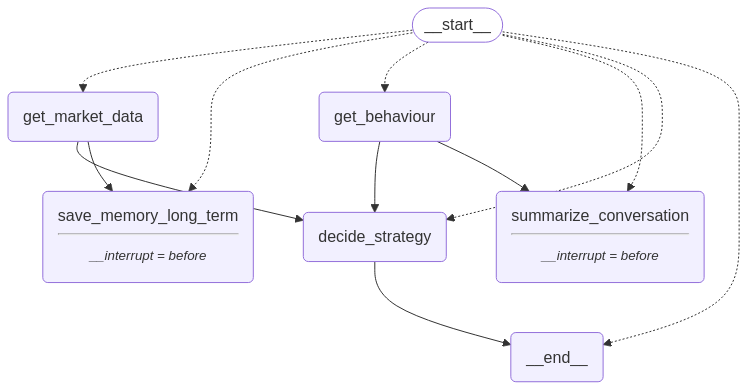

In [33]:
from IPython.display import Image, display
from typing import List, Dict, Any
from pydantic import BaseModel
from langgraph.graph import END, MessagesState, START, StateGraph
from langgraph.checkpoint.memory import MemorySaver

class AgentState(BaseModel):
    """Ossature générale de l'agent"""
    messages: List[str]
    current_step: str
    memory: Dict[str, Any]
    summary: str
    persona: str
    human_input: str


# Créer les fonctions pour chaque node

def get_market_data(state: AgentState) -> AgentState:
    pass

def save_memory_long_term(state: AgentState) -> AgentState:
    pass

def get_behaviour(state: AgentState) -> AgentState:
    # Retrieve conversation thread with a given agent (short term memory)
    # Get info about other agents (potentially engage conversation if bidding/auction mode)
    # Possibility to start auction/bidding mode

    # Add a tool to negotiate with other agents
    pass

def start_auction(state: AgentState) -> AgentState:
    pass

def summarize_conversation(state: AgentState) -> AgentState:
    pass

def decide_strategy(state: AgentState) -> AgentState:
    pass

def decide_agent_type(state: AgentState) -> AgentState:
    if state.__class__.__name__ in ["ConsumerAgent", "ProsumerAgent"]:
        return ["get_market_data", "get_behaviour"]
    elif state.__class__.__name__ in ["EnergyProducerAgent", "UtilityAgent"]:
        return "get_behaviour"
    else:
        return "decide_strategy"

# Créer le graph

builder = StateGraph(AgentState)

builder.add_node("get_market_data", get_market_data)
builder.add_node("save_memory_long_term", save_memory_long_term)
builder.add_node("get_behaviour", get_behaviour)
builder.add_node("summarize_conversation", summarize_conversation)
builder.add_node("decide_strategy", decide_strategy)
# builder.add_node("start_auction", start_auction)

builder.add_conditional_edges(START, decide_agent_type)
builder.add_edge("get_market_data", "save_memory_long_term")
builder.add_edge("get_market_data", "decide_strategy")
builder.add_edge("get_behaviour", "decide_strategy")
builder.add_edge("get_behaviour", "summarize_conversation")
builder.add_edge("decide_strategy", END)

# Compile
memory = MemorySaver()
graph = builder.compile(checkpointer=memory, interrupt_before=["save_memory_long_term", "summarize_conversation"])

# View
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))